In [15]:
import sklearn 
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn.linear_model
import matplotlib as mpl

In [16]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
datapath = os.path.join("datasets", "lifesat", "")
os.makedirs(datapath, exist_ok=True)

In [3]:
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [17]:
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [18]:
def load_thing(oecd, gdp):
    #Life Satisfaction
    oecd = oecd[oecd["INEQUALITY"]=="TOT"]
    oecd = oecd.pivot(index="Country", columns="Indicator", values="Value")
    #GDP data
    gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp.set_index("Country", inplace=True)
    #Merge
    full_country_stats = pd.merge(left=oecd, right=gdp, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats

In [19]:
def prep_country_stats(oecd, gdp):
    load_thing(oecd, gdp)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [20]:
oecd = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',encoding='latin1', na_values="n/a")
full_country_stats = load_thing(oecd, gdp)

In [21]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["Japan"]

GDP per capita       32485.545
Life satisfaction        5.900
Name: Japan, dtype: float64

In [22]:
%matplotlib inline

def graph_gen():
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

    # Prepare the data
    country_stats = prep_country_stats(oecd_bli, gdp_per_capita) 
    X = np.c_[country_stats["GDP per capita"]]
    y = np.c_[country_stats["Life satisfaction"]]
    
    return country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(10,6))

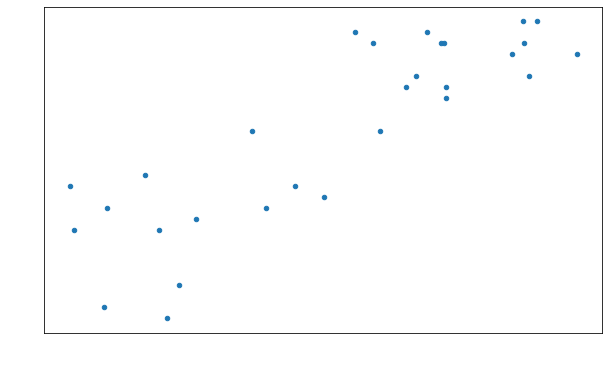

In [23]:
graph_gen()
plt.show()

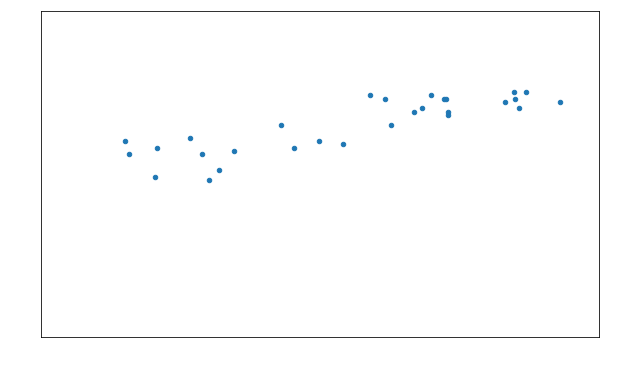

In [24]:
graph_gen()
plt.axis([0, 60000, 0, 10])
plt.show()

In [25]:
rel = sklearn.linear_model.LinearRegression()
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

# Prepare the data
sample_data= prep_country_stats(oecd_bli, gdp_per_capita) 
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
rel.fit(Xsample, ysample)
t0, t1 = rel.intercept_[0], rel.coef_[0][0]
t0, t1

(4.853052800266435, 4.911544589158486e-05)

In [27]:
def graph_w_line():
    sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(10,6))
    plt.xlabel("GDP per capita (USD)")
    plt.axis([0, 60000, 0, 10])
    X=np.linspace(0, 60000, 1000)
    plt.plot(X, t0 + t1*X, "b")
    plt.text(5000, 3.1, r"a= 4.85", fontsize=14, color="b")
    plt.text(5000, 2.2, r"$b = 4.91 \times 10^{-5}$", fontsize=14, color="b")

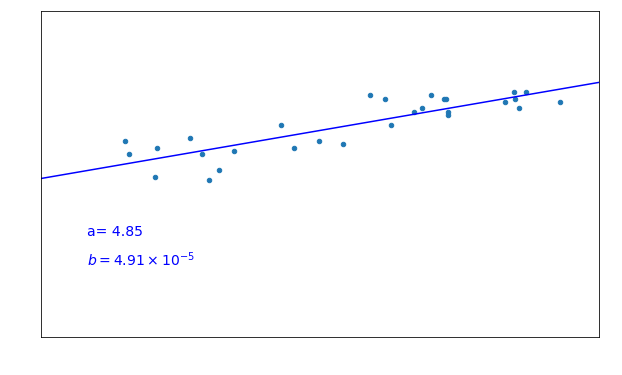

In [28]:
graph_w_line()
plt.show()

In [31]:
gdp = 1900 #India

# Select a linear model
model = sklearn.linear_model.LinearRegression()

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")


#get X and y 
country_stats = prep_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Train the model
model.fit(X, y)

# Make a prediction for India
X_new = [[gdp]]

l_pred = model.predict(X_new)

/private/var/containers/Bundle/Application/75C960C0-D3A3-482F-B1D3-C24DDF4E3AB7/Carnets-sci.app/Library/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


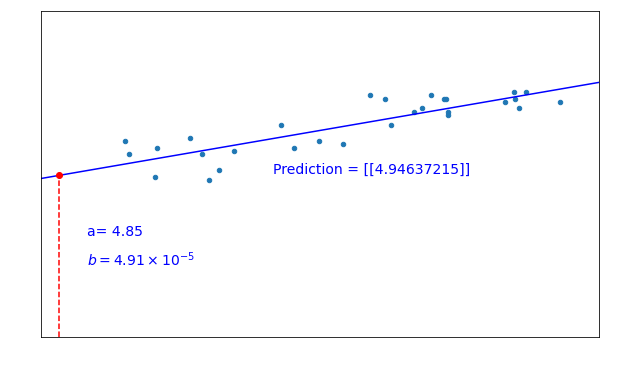

In [32]:
graph_w_line()
plt.plot([gdp, gdp], [0, l_pred], "r--")
plt.text(25000, 5.0, f"Prediction = {l_pred}", fontsize=14, color="b")
plt.plot(gdp, l_pred, "ro")
plt.show()